In [125]:
import pandas as pd
import numpy as np 
import nltk
import matplotlib.pyplot as plt
import operator 
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

## Processing Text Data With Native Python Functionality

In [142]:
filename = open("Sample LCAP Dataset.tsv", "r")

# defining a set of dictionary data structures for general use below
districts = {} # (1) will contain {district: county, SupCon, MPP, SupCon Text, MPP Text}
text = {} # (2) will contain {district: county, SupCon Text, MPP Text}
supcon_freq = {} # (3) will contain the count of distinct (non-stemmed) words in SupCon Text
mpp_freq = {} # (4) will contain the count of distinct (non-stemmed) words in MPP Text

# Iterating through input file and splitting data into rows (districts)
for row in filename:
    row = row.strip("\n")
    item = row.split("\t") # the dataset contains commas, so splitting commas would disorganize 

    districts[item[1]] = [item[0]] + item[2:6] # (1) 

    text[item[1]] = [item[0]] + item[4:6] # (2) 


for i in districts.values(): 
    i[1] = i[1].lstrip("$") # in order for formatting changes to occur, values must be redefined
    i[2] = i[2].rstrip("%")

for j in text.values():
    j[1] = j[1].lower().split(" ")
    j[2] = j[2].lower().split(" ")

    for k in j[1]: 
        supcon_freq[k] = supcon_freq.get(k, 0) + 1 # (3) SupCon Text Word Frequency

    for l in j[2]:
        mpp_freq[l] = mpp_freq.get(l, 0) + 1 # (4) MPP Text Word Frequency



## Word Stemming with Porter Stemmer in the Natural Language Took Kit (appears to be same stemming method as in R)

### Unsuccessful attempt 

In [144]:
ps = PorterStemmer()

for i in text.values(): 
    for j in i[1]:
        j = ps.stem(j)
    
    for k in i[2]:
        k = ps.stem(k)

## Simple Word Frequency Visualization

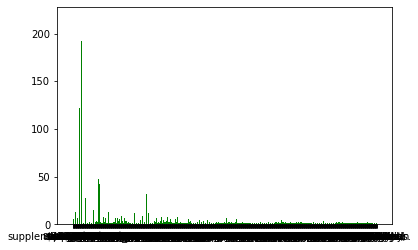

In [116]:
plt.bar(list(supcon_freq.keys()), supcon_freq.values(), color='g')
plt.show()

## ...a bit much. Let's simplify: 

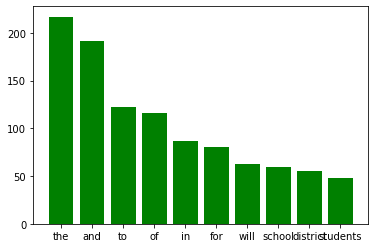

In [120]:
sorted_supcon_freq = dict(sorted(supcon_freq.items(), key=operator.itemgetter(1), reverse=True)[:10])

plt.bar(list(sorted_supcon_freq.keys()), sorted_supcon_freq.values(), color='g')
plt.show()

## Processing Text Data with Pandas Functionality

In [119]:
# pd.read_csv takes a input a .csv file in same file directory as the code file is
df = pd.read_csv("Sample LCAP Dataset.csv")

# the lambda applies a lower case function onto the "SupCon_Text" column (the same can be done with the MPP Text)\
df["SupCon_Text"] = df["SupCon_Text"].apply(lambda x: x.lower())
df["MPP_Text"] = df["MPP_Text"].apply(lambda x: x.lower())

# This produces a word frequency dictionary  
supcon_dict = dict(df["SupCon_Text"].str.split(expand=True).stack().value_counts())

# df produces a visual of the spreadsheet (df means DataFrame but is arbitrary)
df

,County,District,SupCon,MPP,SupCon_Text,MPP_Text
0,Ventura,BriggsElementary,"$442,977",12.41%,briggs elementary school district has over 80...,by increasing time for certificated and quali...
1,Ventura,ConejoValleyUnified,"$3,713,151",2.82%,"in 2014-15, supplemental grant funding is $3,...",the minimum proportionality percentage (mpp) ...
2,Ventura,FillmoreUnified,"$2,100,000",11%,"for the 2014-15 school year, fillmore unified...","for the 2014-15 schoolyear, an 11% increase i..."
3,Ventura,HuenemeElementary,"$7,200,000",13.66%,the majority of students attending schools in...,in meeting the minimum proportionality percen...
4,Ventura,MesaUnionElementary,"$145,503",3.69%,supplemental grant funds in 2014-2015 will to...,the mesa union school district local control ...
5,Ventura,MoorparkUnified,"$1,500,000",3.56%,moorpark unified school district will receive...,moorpark unified school district - proportion...
6,Ventura,MupuElementary,"$53,086",4.97%,mupu elementary has over 55% unduplicated pup...,by increasing time for certificated and quali...
7,Ventura,OakParkUnified,"$312,956",1%,oak park usd has less than 9% unduplicated st...,the minimum proportionality percentage for oa...
8,Ventura,OceanView,"$1,300,000",16%,calculated on the basis of the number and con...,calculated on the basis of the number and conc...
9,Ventura,OjaiUnified,"$592,493",3.44%,"the district received $592,493 of increased l...",ojai unified school district's percentage by ...


## Similar Word Stemming

### Unsuccessful attempt

In [151]:
ps = PorterStemmer()

df["SupCon_Text"] = df["SupCon_Text"].apply(lambda x: ps.stem(x))


## Similar visualization

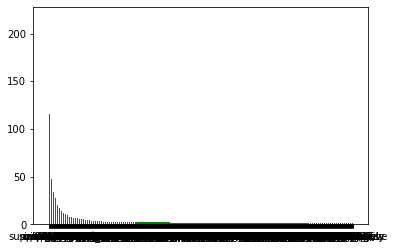

In [118]:
plt.bar(list(supcon_dict.keys()), supcon_dict.values(), color='g')
plt.show()

## Ordered, but not a whole lot better. Let's simplify again:

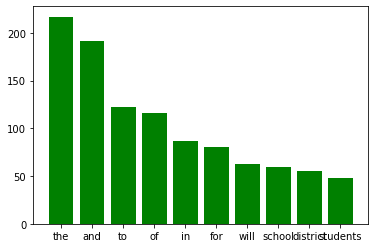

In [121]:
sorted_supcon_dict = dict(sorted(supcon_dict.items(), key=operator.itemgetter(1), reverse=True)[:10])

plt.bar(list(sorted_supcon_dict.keys()), sorted_supcon_dict.values(), color='g')
plt.show()